# Task 1

### Import TensorFlow

In [9]:
import tensorflow as tf
import tensorflow.compat.v1 as tfc
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import cv2
from random import randint

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy

#### Define Methods

In [10]:
def evaluate(testSet, testLabels, testModel):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')

    test_loss, test_acc = testModel.evaluate(testSet, testLabels, verbose=2) 
    print("ACCURACY: " + str(test_acc))
    
def displaySamplesFromDataSet(xDataSet, yDataset):
    # define number of images to show
    num_row = 2
    num_col = 8
    num= num_row*num_col
    
    # get images
    images = xDataSet[0:num]
    labels = yDataset[0:num]
    
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
         ax = axes[i//num_col, i%num_col]
         ax.imshow(images[i], cmap='gray_r')
         ax.set_title('Label: {}'.format(labels[i]))
    plt.tight_layout()
    plt.show()

#### Load MNIST Dataset

In [11]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255
test_images = test_images / 255

#### Building a Training Pipeline

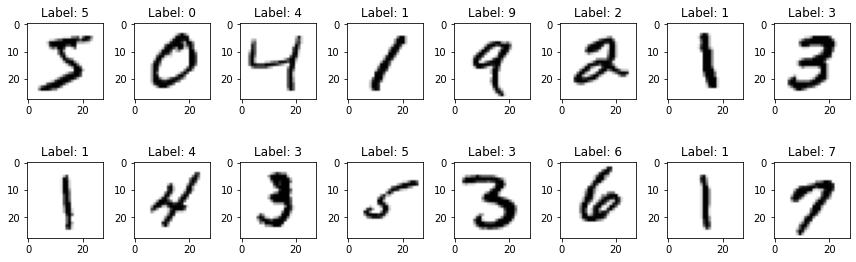

In [12]:
displaySamplesFromDataSet(train_images, train_labels)

#### Building an Evaluation Pipeline

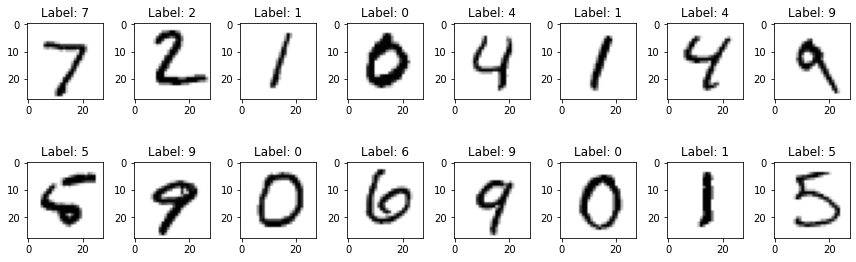

In [13]:
displaySamplesFromDataSet(test_images, test_labels)

#### Create and Train the Model

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 39s 20ms/step - loss: 0.1451 - accuracy: 0.9547 - val_loss: 0.0475 - val_accuracy: 0.9844
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0456 - accuracy: 0.9861 - val_loss: 0.0349 - val_accuracy: 0.9894
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0334 - accuracy: 0.9894 - val_loss: 0.0270 - val_accuracy: 0.9914
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0252 - accuracy: 0.9923 - val_loss: 0.0295 - val_accuracy: 0.9901
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.0335 - val_accuracy: 0.9899


#### Evaluate the Model

313/313 - 1s - loss: 0.0233 - accuracy: 0.9928 - 1s/epoch - 4ms/step
ACCURACY: 0.9927999973297119


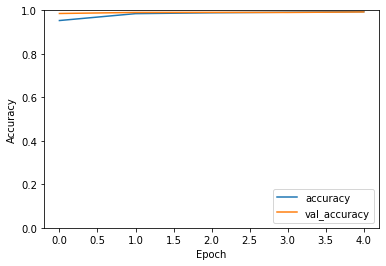

In [8]:
evaluate(test_images, test_labels, model)